In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

#중산층 소비지출의 데이터를 가져온다. 
middle = pd.read_csv('./middle.csv')
middle.head() 

In [6]:
#데이터를 정규화한다. 
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(middle)

middle_regu = scaler.transform(middle)
middle_regu.shape , type(middle_regu)
middle_regu = pd.DataFrame(middle_regu)


In [7]:
middle_regu.columns = ['food','book','cul','cloth','travel','status']
middle_regu

,food,book,cul,cloth,travel,status
0,-0.679491,0.285453,0.769363,-0.392849,1.161096,0.670280
1,-1.366491,-0.793116,-1.704388,-0.177986,0.731897,0.670280
2,1.762079,-1.082473,1.588480,-0.114819,1.757418,-1.491914
3,0.533770,-0.490561,0.311090,-0.546207,-1.303885,0.670280
4,0.863950,-0.588070,0.356134,3.120538,1.546859,-1.491914
...,...,...,...,...,...,...
95,-1.578440,-0.166059,0.828053,-0.831106,0.817433,0.670280
96,0.589127,1.025649,-1.540227,0.791461,0.679229,0.670280
97,0.149533,0.282381,-0.899934,-1.467939,-0.411665,0.670280
98,0.440784,-0.385771,-2.105312,0.634279,0.550286,-1.491914


In [8]:
#훈련데이터를 만든다. y는 target데이터이다. 

X = middle_regu.iloc[:, [0,1,2,3,4]].values  
y = middle_regu.iloc[:, 5].values  

In [11]:
X.shape , len(middle) , y.shape
X

array([[-6.79490582e-01,  2.85452572e-01,  7.69363065e-01,
        -3.92848549e-01,  1.16109560e+00],
       [-1.36649081e+00, -7.93115937e-01, -1.70438786e+00,
        -1.77986086e-01,  7.31897271e-01],
       [ 1.76207947e+00, -1.08247293e+00,  1.58847972e+00,
        -1.14819268e-01,  1.75741834e+00],
       [ 5.33770153e-01, -4.90560785e-01,  3.11090235e-01,
        -5.46207407e-01, -1.30388542e+00],
       [ 8.63949841e-01, -5.88070095e-01,  3.56134286e-01,
         3.12053813e+00,  1.54685944e+00],
       [-9.55034863e-01, -6.56679973e-01,  1.03540717e-02,
         7.84325978e-01,  1.43126140e-01],
       [-1.04290710e+00,  3.24664723e-01,  1.94243500e-01,
         8.05043535e-02, -1.40235462e+00],
       [-5.31724583e-02,  4.88510281e-01,  9.15523136e-01,
         2.84851975e-01,  7.49844332e-01],
       [-2.19010248e-01,  3.83124161e-01,  3.96799407e-01,
        -1.13684875e+00, -1.00538045e+00],
       [ 1.16507338e-01,  1.10917815e+00,  6.44628679e-01,
        -7.93871530e-01

In [12]:
y

array([ 0.67028006,  0.67028006, -1.49191369,  0.67028006, -1.49191369,
        0.67028006,  0.67028006,  0.67028006,  0.67028006,  0.67028006,
        0.67028006,  0.67028006,  0.67028006,  0.67028006, -1.49191369,
        0.67028006,  0.67028006,  0.67028006,  0.67028006,  0.67028006,
       -1.49191369, -1.49191369,  0.67028006, -1.49191369, -1.49191369,
       -1.49191369,  0.67028006,  0.67028006,  0.67028006,  0.67028006,
        0.67028006,  0.67028006,  0.67028006, -1.49191369, -1.49191369,
        0.67028006,  0.67028006,  0.67028006,  0.67028006, -1.49191369,
        0.67028006, -1.49191369,  0.67028006, -1.49191369,  0.67028006,
       -1.49191369,  0.67028006, -1.49191369,  0.67028006,  0.67028006,
        0.67028006, -1.49191369, -1.49191369,  0.67028006, -1.49191369,
        0.67028006,  0.67028006, -1.49191369, -1.49191369, -1.49191369,
       -1.49191369,  0.67028006, -1.49191369,  0.67028006,  0.67028006,
       -1.49191369,  0.67028006,  0.67028006,  0.67028006,  0.67

결정계수 0.6082849462996812


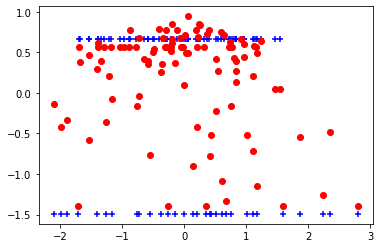

In [13]:
model = svm.SVR()
model.fit(X, y)

#결정계수를 계산한다. 
r2 = model.score(X, y)
print('결정계수', r2)

#시각화 
plt.scatter(X[:,2], y, marker='+' , c = 'blue')
plt.scatter(X[:,2], model.predict(X), marker='o' , c = 'red')
plt.show()


In [14]:
pred_lst = list(model.predict(X) > 0)

In [15]:
origin_lst = list(middle.status == 1)

In [16]:
pred_lst

[True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False]

In [19]:
sum([pred_lst[i] == origin_lst[i] for i in range(0,len(pred_lst))]) / len(pred_lst)

0.95

In [20]:
from sklearn import datasets
from sklearn import svm

cancer=datasets.load_breast_cancer()
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [21]:
print("Features:",cancer.feature_names)
print("Labels:",cancer.target_names)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels: ['malignant' 'benign']


In [22]:
cancer.data.shape

(569, 30)

In [24]:
cancer.target,cancer.target.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [25]:
cancer.data,cancer.data.shape

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 (569, 30))

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,test_size=0.3,random_state=109)

In [27]:
X_train,y_train

(array([[1.422e+01, 2.312e+01, 9.437e+01, ..., 1.772e-01, 5.166e-01,
         1.446e-01],
        [1.120e+01, 2.937e+01, 7.067e+01, ..., 0.000e+00, 1.566e-01,
         5.905e-02],
        [1.650e+01, 1.829e+01, 1.066e+02, ..., 9.123e-02, 2.394e-01,
         6.469e-02],
        ...,
        [1.611e+01, 1.805e+01, 1.051e+02, ..., 1.216e-01, 2.792e-01,
         8.158e-02],
        [1.048e+01, 1.986e+01, 6.672e+01, ..., 6.736e-02, 2.883e-01,
         7.748e-02],
        [1.729e+01, 2.213e+01, 1.144e+02, ..., 1.528e-01, 3.067e-01,
         7.484e-02]]),
 array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
 

In [28]:
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [30]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9649122807017544
